<a href="https://colab.research.google.com/github/akshay3627/akshay3627/blob/main/Netflix_Movies_%26_TV_Shows_Clustering_%26_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.**Introduction**

This project analyzes a dataset of Netflix Movies and TV Shows to identify patterns,visualize insights, apply clustering techniques to group similar types of content and train a supervised machine learning model to classify content type (Movie or TV Show)
based on available features.

**Import libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [9]:
df = pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Data Cleaning

In [10]:
df.drop_duplicates(inplace=True)

**Handle missing values**

In [11]:
missing_cols =df.columns[df.isnull().any()]
for col in missing_cols:
  if df [col].dtype == 'object':
    df[col].fillna('unknown',inplace=True)
  else:
    df[col].fillna(0, inplace=True)




**Convert Data added to datetime**

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

**Exploratory Data Analysis (EDA)**

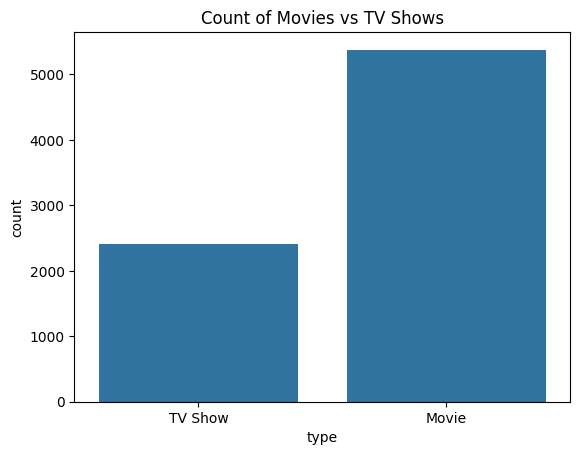

In [13]:
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows")
plt.show()

**Top 10 countries by content**

<function matplotlib.pyplot.show(close=None, block=None)>

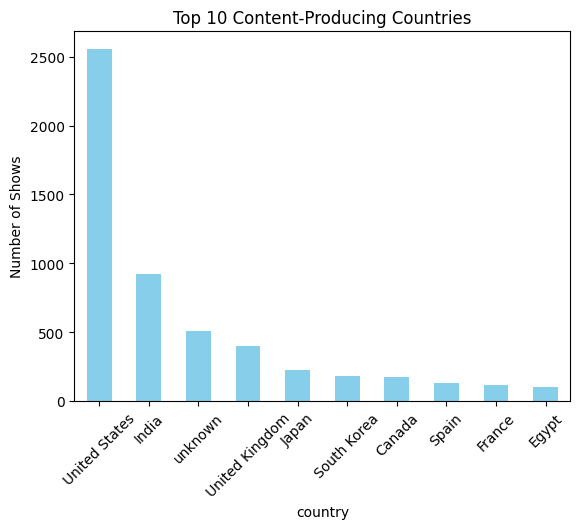

In [14]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar',color='skyblue')
plt.title("Top 10 Content-Producing Countries")
plt.ylabel("Number of Shows")
plt.xticks(rotation=45)
plt.show

**Year wise content added**

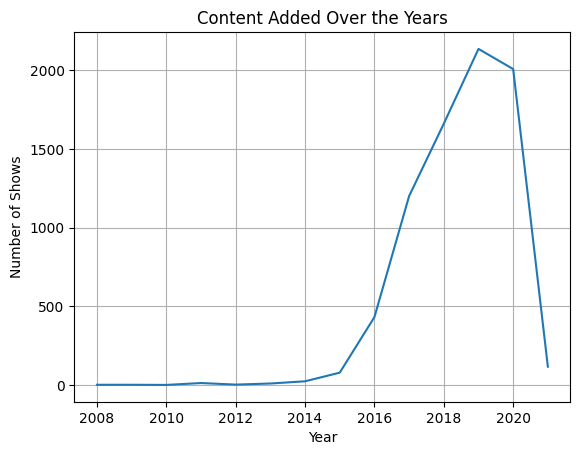

In [15]:
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.grid()
plt.show()

**Ratings distribution**

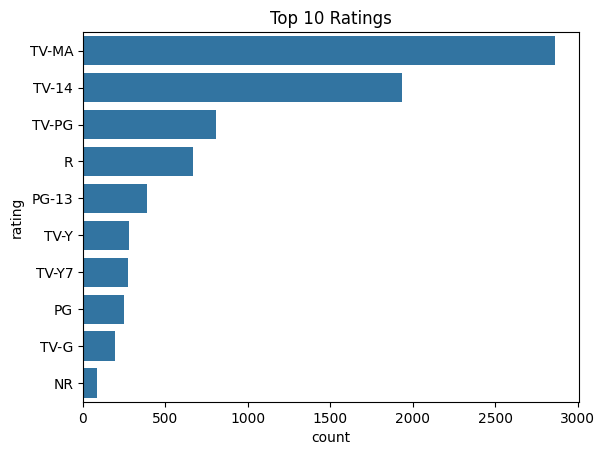

In [17]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10])
plt.title("Top 10 Ratings")
plt.show()

**Feature Engineering**

In [18]:
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
encoded_df = pd.get_dummies(df[['type', 'genre']])

**Clustering**

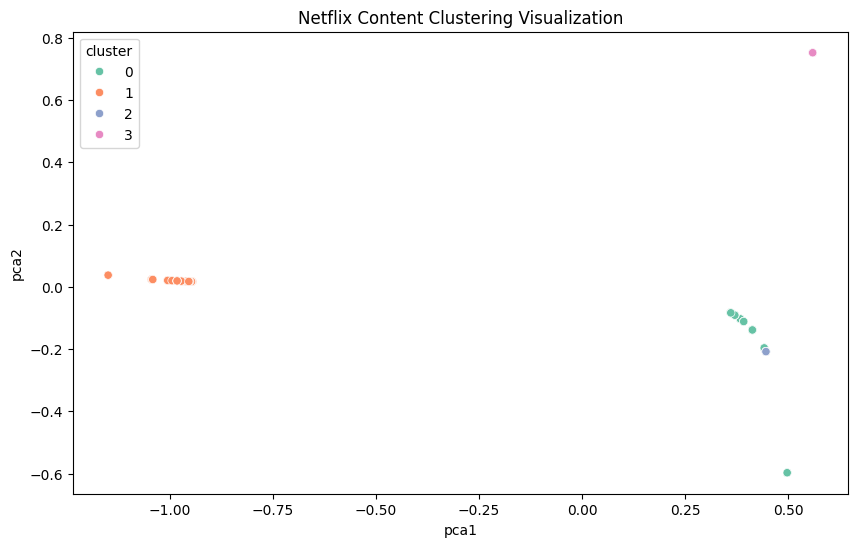

In [22]:
kmeans = KMeans(n_clusters=4, random_state =42)
kmeans.fit(encoded_df)
df['cluster'] = kmeans.labels_

pca = PCA(n_components=2)
components = pca.fit_transform(encoded_df)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("Netflix Content Clustering Visualization")
plt.show()




**Supervised Model - Predicting Type**

In [24]:
label_enc = LabelEncoder()
df['genre_encoded'] = label_enc.fit_transform(df['genre'])

X = df[['release_year','genre_encoded']]
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Accuracy: 0.993581514762516

Classification Report:
               precision    recall  f1-score   support

       Movie       0.99      1.00      1.00      1090
     TV Show       0.99      0.99      0.99       468

    accuracy                           0.99      1558
   macro avg       0.99      0.99      0.99      1558
weighted avg       0.99      0.99      0.99      1558



**Conclusion**

The project successfully explored and visualized Netflix data, grouped similar content using clustering and built a Random Forest model that classifies whether a title is a Movie or TV Show based on year and genre.
